In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


df = pd.read_csv('data/netflix_titles.csv')

In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print(len(df["description"][0]))
print(df["description"][0])


152
As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.


In [5]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (8807, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [6]:
def analyse_missing_value(df):
    missing_value = df.isnull().sum()
    missing_percentage = (missing_value/len(df))*100
    missing_df = pd.DataFrame({
        'Missing Value': missing_value,
        'Percentage': missing_percentage.round(2)
    })
    print("\nMissing Value Analysis:")
    print(missing_df[missing_df['Missing Value']>0].sort_values('Missing Value', ascending = False))

analyse_missing_value(df)
print("\n=============================================")
print("\nContent Type Distribution:")
print(df['type'].value_counts())


Missing Value Analysis:
            Missing Value  Percentage
director             2634       29.91
country               831        9.44
cast                  825        9.37
date_added             10        0.11
rating                  4        0.05
duration                3        0.03


Content Type Distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


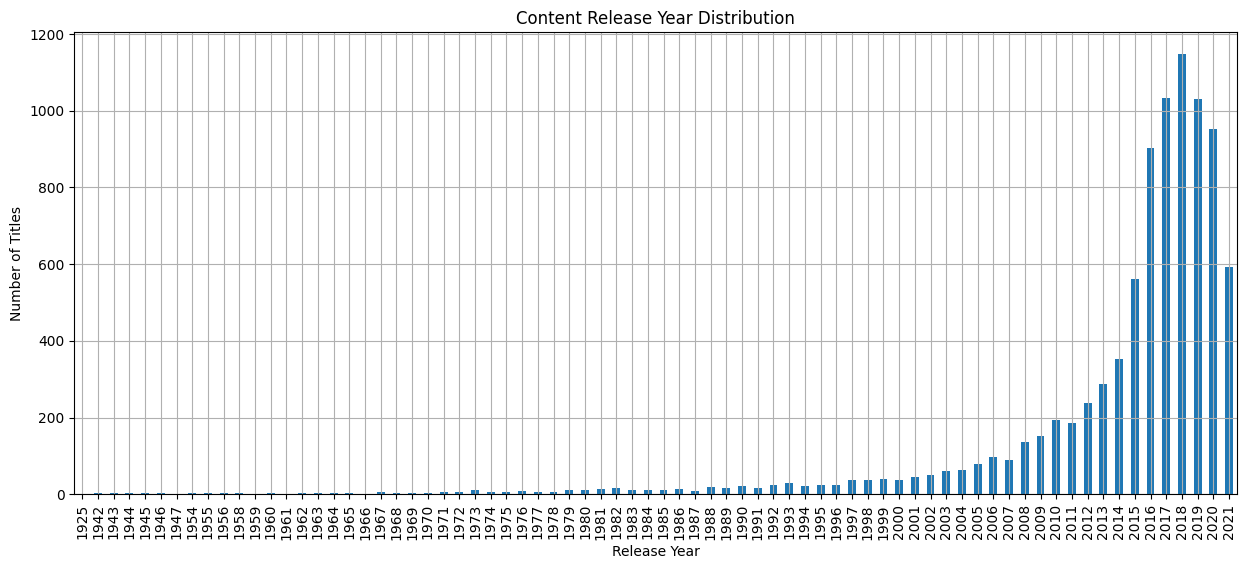

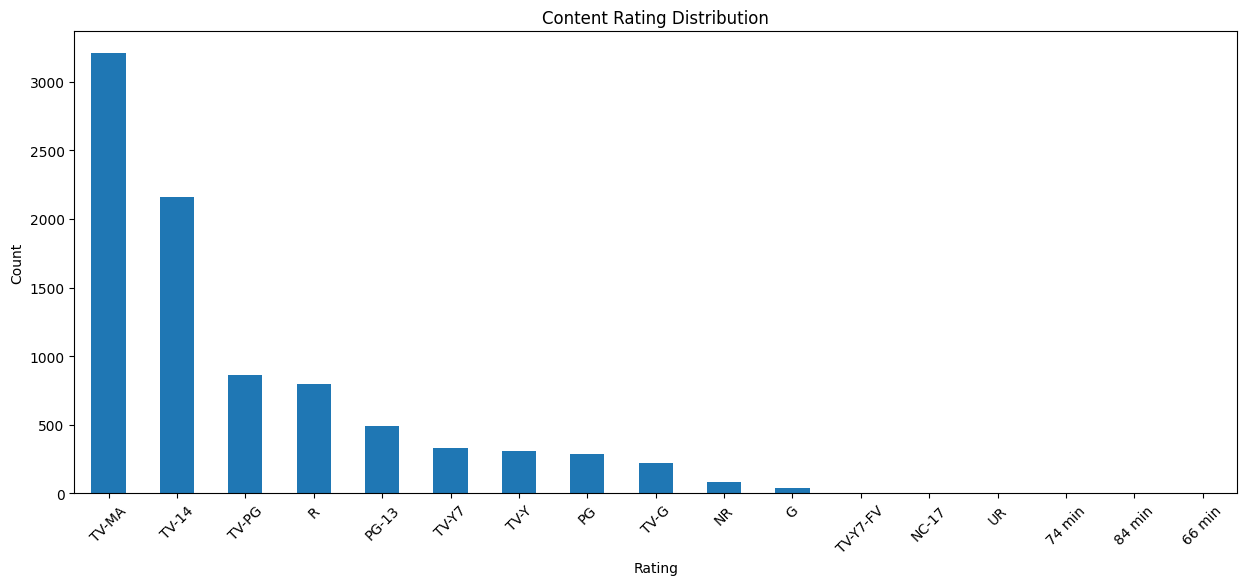

In [7]:
#Release Year Analysis
plt.figure(figsize = (15,6))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Content Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


#Rating Distribution
plt.figure(figsize = (15,6))
df['rating'].value_counts().plot(kind = "bar")
plt.title('Content Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

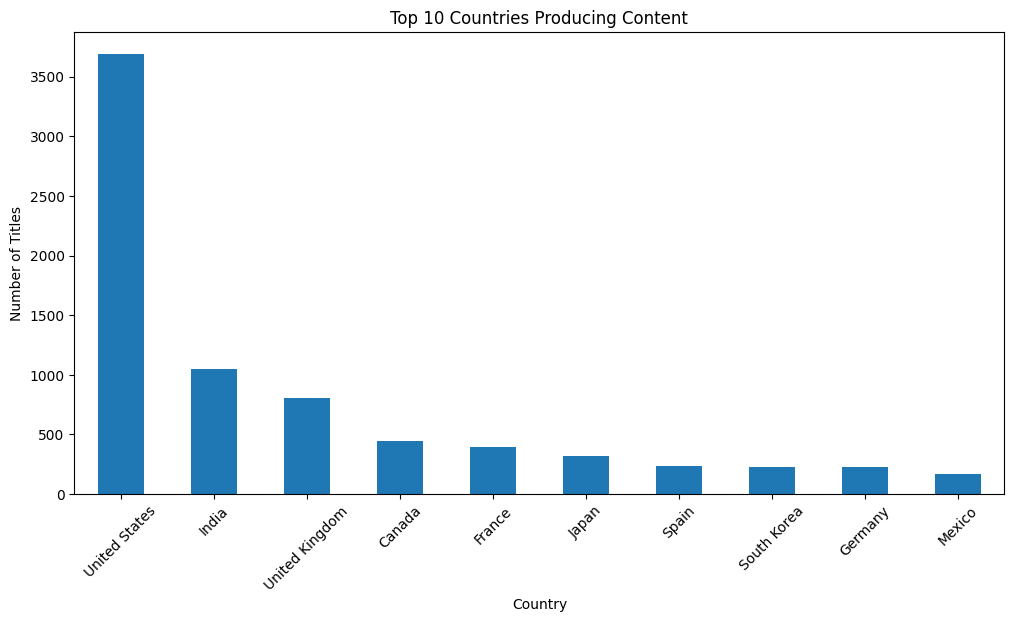

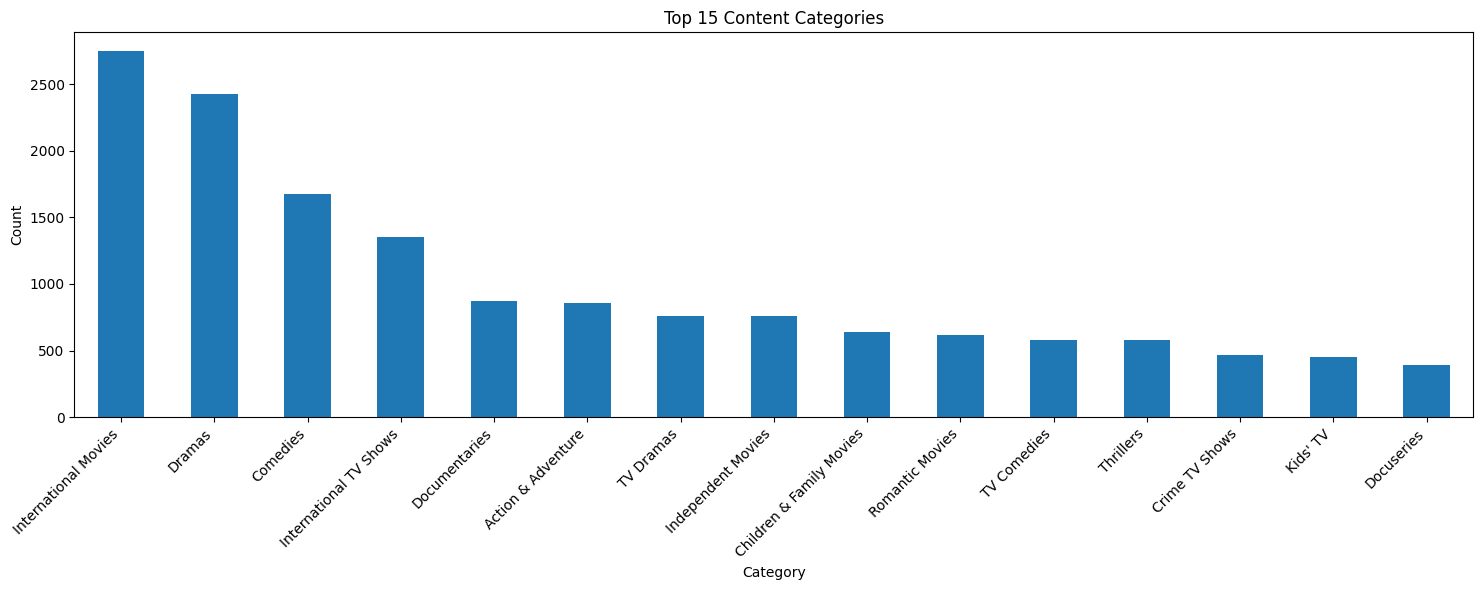

In [8]:
# Top 10 Countries
def analyze_countries(df):
    # Split multiple countries and count each occurrence
    countries = df['country'].dropna().str.split(', ').explode()
    top_countries = countries.value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    top_countries.plot(kind='bar')
    plt.title('Top 10 Countries Producing Content')
    plt.xlabel('Country')
    plt.ylabel('Number of Titles')
    plt.xticks(rotation=45)
    plt.show()

analyze_countries(df)

# Content Categories Analysis
def analyze_categories(df):
    categories = df['listed_in'].dropna().str.split(', ').explode()
    top_categories = categories.value_counts().head(15)
    
    plt.figure(figsize=(15, 6))
    top_categories.plot(kind='bar')
    plt.title('Top 15 Content Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

analyze_categories(df)

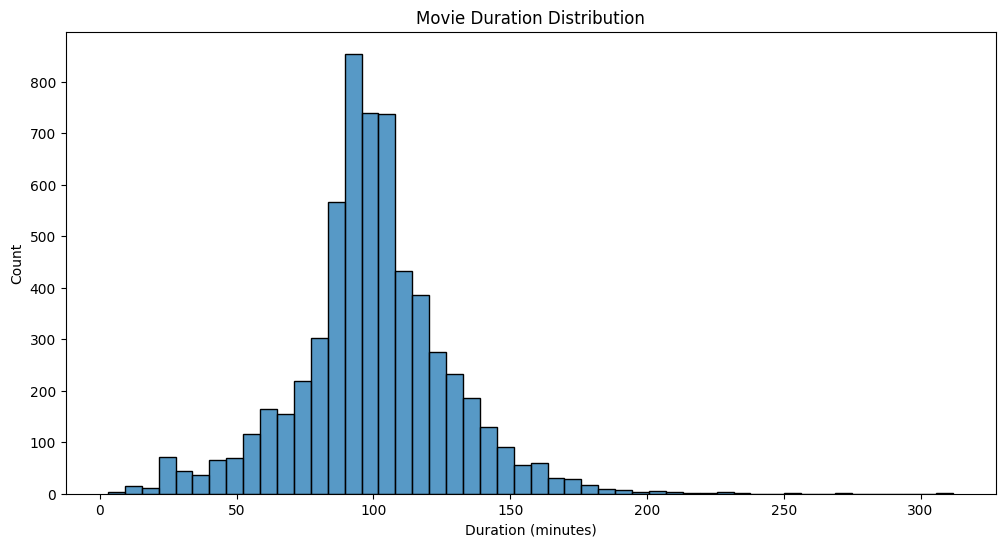


TV Show Seasons Distribution:
0
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
11.0       2
12.0       2
13.0       3
15.0       2
17.0       1
Name: count, dtype: int64


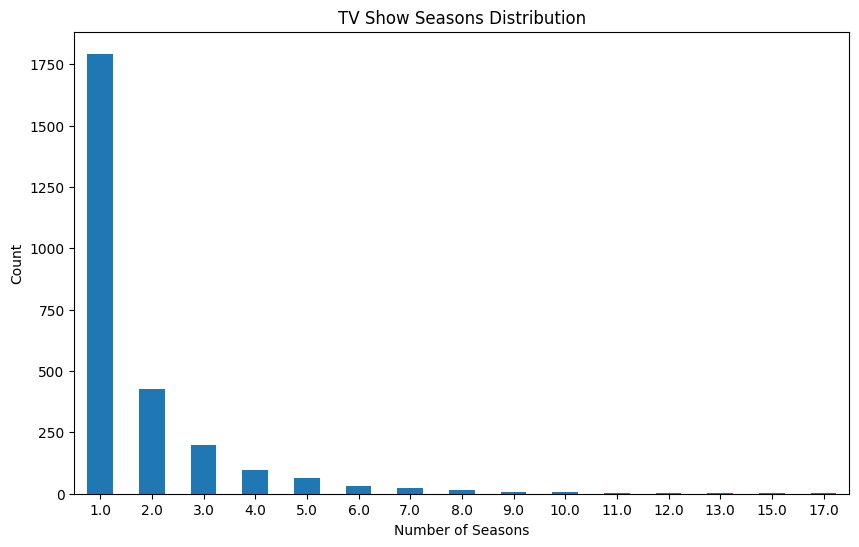

In [9]:
def analyze_duration(df):
    # Separate movies and TV shows
    movies = df[df['type'] == 'Movie'].copy()  # Use .copy() to avoid SettingWithCopyWarning
    tv_shows = df[df['type'] == 'TV Show'].copy()
    
    # Convert movie duration to numeric (remove 'min' and convert to int)
    movies['duration_num'] = movies['duration'].str.extract('(\d+)').astype(float)
    
    # Plot movie duration distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(data=movies, x='duration_num', bins=50)
    plt.title('Movie Duration Distribution')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Count')
    plt.show()
    
    # Analyze TV show seasons
    print("\nTV Show Seasons Distribution:")
    # Extract numbers from strings like "2 Seasons" using regex
    tv_seasons = tv_shows['duration'].str.extract('(\d+)').astype(float).squeeze()
    season_distribution = tv_seasons.value_counts().sort_index()
    print(season_distribution)
    
    # Plot TV show seasons distribution
    plt.figure(figsize=(10, 6))
    season_distribution.plot(kind='bar')
    plt.title('TV Show Seasons Distribution')
    plt.xlabel('Number of Seasons')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

analyze_duration(df)

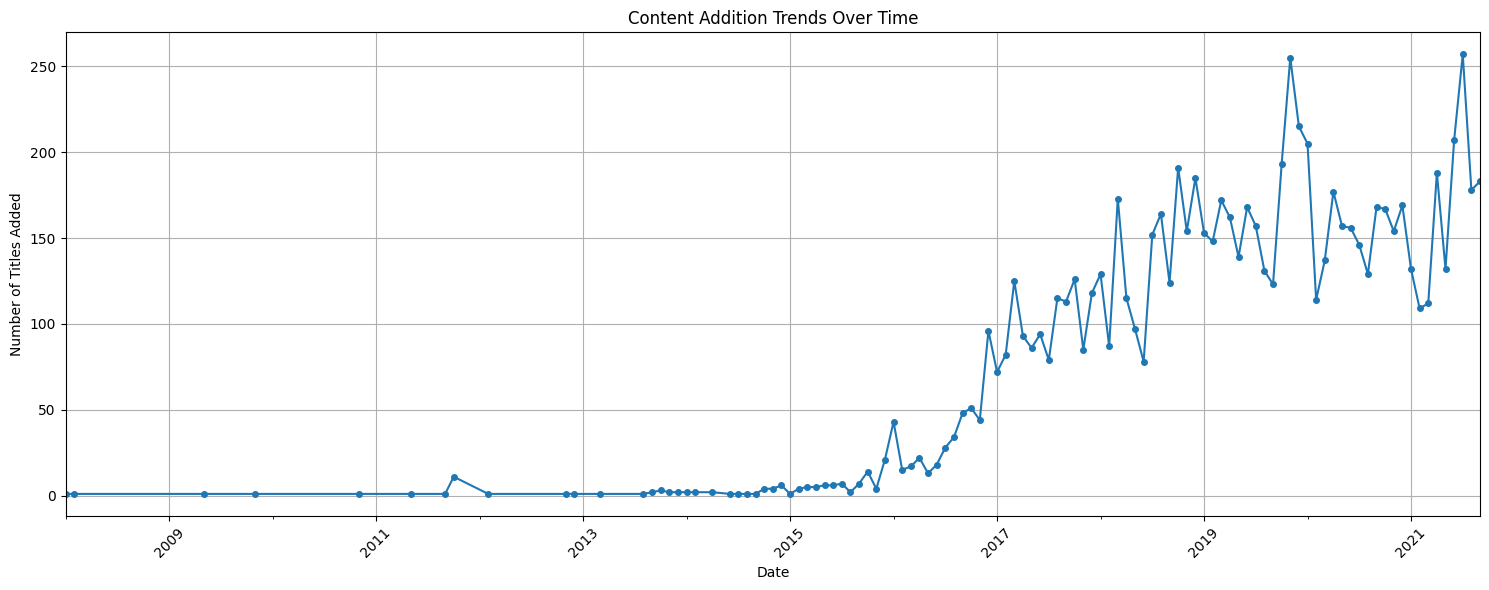


Content Addition Statistics:
Peak month: 2021-07 with 257 titles
Average monthly additions: 81.5 titles


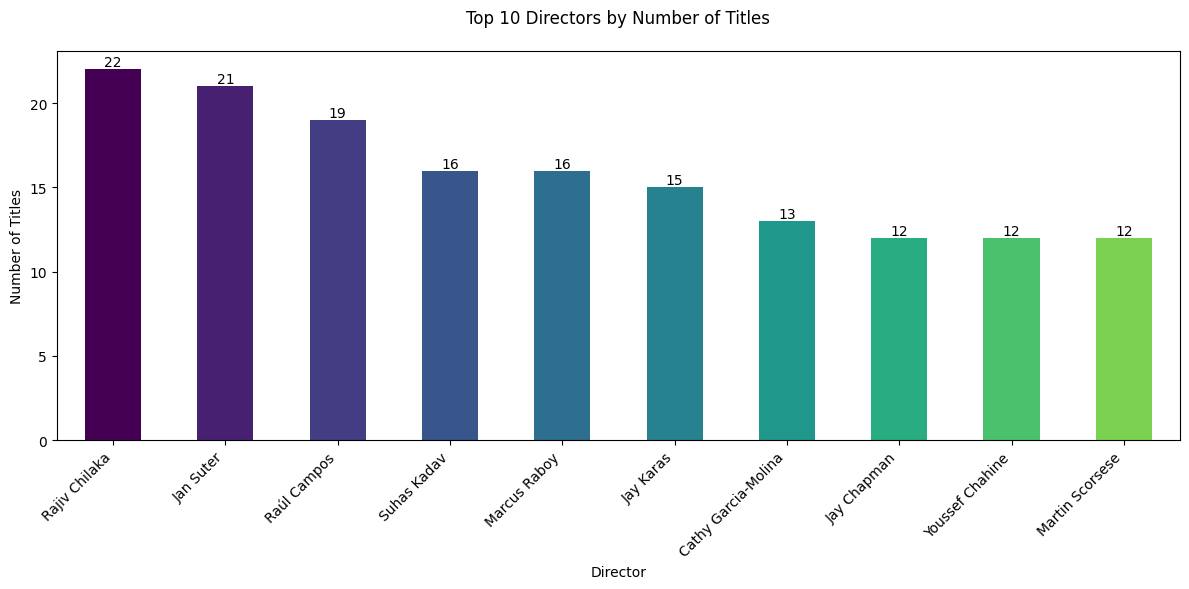


Director Statistics:
Total number of unique directors: 4993

Top 10 Directors and their title counts:
Rajiv Chilaka: 22 titles
Jan Suter: 21 titles
Raúl Campos: 19 titles
Suhas Kadav: 16 titles
Marcus Raboy: 16 titles
Jay Karas: 15 titles
Cathy Garcia-Molina: 13 titles
Jay Chapman: 12 titles
Youssef Chahine: 12 titles
Martin Scorsese: 12 titles

Summary Statistics for Numeric Columns:

Release Year Statistics:
count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

Content Type Distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Rating Distribution:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min 

In [10]:
def analyze_addition_trends(df):
    # Create a copy of the dataframe
    df_copy = df.copy()
    
    # Clean date_added column by removing leading/trailing spaces
    df_copy['date_added'] = df_copy['date_added'].str.strip()
    
    # Convert date_added to datetime with mixed format
    df_copy['date_added'] = pd.to_datetime(df_copy['date_added'], format='mixed')
    
    # Group by month and year
    monthly_additions = df_copy.groupby(df_copy['date_added'].dt.to_period('M')).size()
    
    # Create the plot
    plt.figure(figsize=(15, 6))
    monthly_additions.plot(kind='line', marker='o', markersize=4)
    plt.title('Content Addition Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Titles Added')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print some statistics about content additions
    print("\nContent Addition Statistics:")
    print(f"Peak month: {monthly_additions.idxmax()} with {monthly_additions.max()} titles")
    print(f"Average monthly additions: {monthly_additions.mean():.1f} titles")
    
def analyze_directors(df):
    # Get top directors by number of titles
    top_directors = df['director'].dropna().str.split(', ').explode().value_counts().head(10)
    
    # Create a more visually appealing plot
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(top_directors)))
    bars = top_directors.plot(kind='bar', color=colors)
    plt.title('Top 10 Directors by Number of Titles', pad=20)
    plt.xlabel('Director')
    plt.ylabel('Number of Titles')
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of bars
    for i, v in enumerate(top_directors):
        plt.text(i, v, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print additional director statistics
    print("\nDirector Statistics:")
    print(f"Total number of unique directors: {df['director'].dropna().str.split(', ').explode().nunique()}")
    print("\nTop 10 Directors and their title counts:")
    for director, count in top_directors.items():
        print(f"{director}: {count} titles")

# Function to show more detailed summary statistics
def show_summary_statistics(df):
    print("\nSummary Statistics for Numeric Columns:")
    
    # Basic statistics for release_year
    print("\nRelease Year Statistics:")
    print(df['release_year'].describe())
    
    # Content type distribution
    print("\nContent Type Distribution:")
    print(df['type'].value_counts())
    
    # Rating distribution
    print("\nRating Distribution:")
    print(df['rating'].value_counts())
    
    # Calculate percentage of missing values
    missing_data = (df.isnull().sum() / len(df)) * 100
    print("\nPercentage of Missing Values:")
    print(missing_data[missing_data > 0].round(2))

# Run the analyses
analyze_addition_trends(df)
analyze_directors(df)
show_summary_statistics(df)

In [11]:
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"\n{column}: {df[column].nunique()} unique values")


Unique Values in Each Column:

show_id: 8807 unique values

type: 2 unique values

title: 8807 unique values

director: 4528 unique values

cast: 7692 unique values

country: 748 unique values

date_added: 1767 unique values

release_year: 74 unique values

rating: 17 unique values

duration: 220 unique values

listed_in: 514 unique values

description: 8775 unique values


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
import re
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import tensorflow as tf
import tensorflow_hub as hub
from scipy.sparse import hstack

In [14]:
# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/egoitzaulestiapadilla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/egoitzaulestiapadilla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
class NetflixRecommender:
    def __init__(self, df):
        self.df = df.copy()
        self.df['description'] = self.df['description'].fillna('')
        self.df['director'] = self.df['director'].fillna('')
        self.df['cast'] = self.df['cast'].fillna('')
        self.df['listed_in'] = self.df['listed_in'].fillna('')
        
        # Create a combined features column
        self.df['combined_features'] = self.create_combined_features()
        
        # Create TF-IDF matrix
        self.tfidf = TfidfVectorizer(stop_words='english')
        self.tfidf_matrix = self.tfidf.fit_transform(self.df['combined_features'])
        
        # Calculate similarity matrix
        self.similarity_matrix = cosine_similarity(self.tfidf_matrix)
    
    def clean_text(self, text):
        """Clean and preprocess text data"""
        # Convert to lowercase and remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [w for w in words if w not in stop_words]
        
        return ' '.join(words)
    
    def create_combined_features(self):
        """Combine different features into a single string"""
        return (self.df['description'].apply(self.clean_text) + ' ' +
                self.df['director'].apply(self.clean_text) + ' ' +
                self.df['cast'].apply(self.clean_text) + ' ' +
                self.df['listed_in'].apply(self.clean_text))
    
    def get_recommendations(self, title, n_recommendations=5):
        """Get n_recommendations similar titles based on the input title"""
        try:
            # Find the index of the movie/show
            idx = self.df[self.df['title'] == title].index[0]
            
            # Get similarity scores for all titles
            similarity_scores = list(enumerate(self.similarity_matrix[idx]))
            
            # Sort based on similarity scores
            similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
            
            # Get top n similar titles (excluding the input title)
            similar_titles = similarity_scores[1:n_recommendations+1]
            
            recommendations = []
            for i, score in similar_titles:
                recommendations.append({
                    'title': self.df.iloc[i]['title'],
                    'type': self.df.iloc[i]['type'],
                    'description': self.df.iloc[i]['description'],
                    'similarity_score': score,
                    'genre': self.df.iloc[i]['listed_in']
                })
            
            return recommendations
        
        except IndexError:
            return f"Title '{title}' not found in the dataset."

In [17]:
df = pd.read_csv('data/netflix_titles.csv')
    
# Initialize recommender
recommender = NetflixRecommender(df)
    
# Example: Get recommendations for a specific title
test_title = "Stranger Things"
recommendations = recommender.get_recommendations(test_title)
    
# Print recommendations
print(f"\nRecommendations based on '{test_title}':")
for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. {rec['title']}")
    print(f"Type: {rec['type']}")
    print(f"Genre: {rec['genre']}")
    print(f"Similarity Score: {rec['similarity_score']:.2f}")
    print(f"Description: {rec['description'][:100]}...")


Recommendations based on 'Stranger Things':

1. Beyond Stranger Things
Type: TV Show
Genre: Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy
Similarity Score: 0.51
Description: Secrets from the "Stranger Things 2" universe are revealed as cast and guests discuss the latest epi...

2. Prank Encounters
Type: TV Show
Genre: Reality TV, TV Comedies, TV Horror
Similarity Score: 0.15
Description: Monstrous frights meet hilarious reveals on this hidden-camera prank show as real people become the ...

3. Safe Haven
Type: Movie
Genre: Dramas, Romantic Movies
Similarity Score: 0.10
Description: When a mysterious woman arrives in a small North Carolina town, she begins a new life but remains ha...

4. Eli
Type: Movie
Genre: Horror Movies
Similarity Score: 0.10
Description: With his desperate parents in tow, an 11-year-old boy with a debilitating illness checks into an iso...

5. Anjaan: Special Crimes Unit
Type: TV Show
Genre: International TV Shows, TV Horror, TV Mysteries
Simila

In [18]:
class AdvancedNetflixRecommender:
    def __init__(self, df):
        self.df = df.copy()
        # Fill NaN values
        self.df['description'] = self.df['description'].fillna('')
        self.df['director'] = self.df['director'].fillna('')
        self.df['cast'] = self.df['cast'].fillna('')
        self.df['listed_in'] = self.df['listed_in'].fillna('')
        
        # Download required NLTK data
        nltk.download('stopwords')
        nltk.download('punkt')
        
        # Initialize models
        self.bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
        self.init_models()

    def clean_text(self, text):
        """Clean and preprocess text"""
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [t for t in tokens if t not in stop_words]
        return ' '.join(tokens)

    def init_models(self):
        """Initialize all component models"""
        # Process descriptions with BERT
        print("Processing descriptions with BERT...")
        self.description_embeddings = self.bert_model.encode(self.df['description'].tolist())
        
        # Create TF-IDF vectors for different features
        print("Creating TF-IDF vectors...")
        self.tfidf = TfidfVectorizer(stop_words='english')
        self.genre_matrix = self.tfidf.fit_transform(self.df['listed_in'])
        
        # Train Word2Vec on descriptions
        print("Training Word2Vec model...")
        descriptions_tokens = [word_tokenize(self.clean_text(desc)) 
                             for desc in self.df['description']]
        self.word2vec_model = Word2Vec(sentences=descriptions_tokens, 
                                     vector_size=1000, 
                                     window=10, 
                                     min_count=1)
        
        # Create description embeddings using Word2Vec
        self.desc_w2v_embeddings = np.array([
            np.mean([self.word2vec_model.wv[word] 
                    for word in word_tokenize(self.clean_text(desc))
                    if word in self.word2vec_model.wv]
                   or [np.zeros(1000)], axis=0)
            for desc in self.df['description']
        ])
        
        # Cluster similar content
        print("Clustering content...")
        self.n_clusters = 10
        combined_features = np.concatenate([
            self.description_embeddings,
            self.desc_w2v_embeddings
        ], axis=1)
        
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        self.clusters = self.kmeans.fit_predict(combined_features)
        self.df['cluster'] = self.clusters

    def get_description_similarity(self, idx):
        """Get similarity scores based on BERT description embeddings"""
        return cosine_similarity(
            self.description_embeddings[idx].reshape(1, -1),
            self.description_embeddings
        ).flatten()

    def get_genre_similarity(self, idx):
        """Get similarity scores based on genre TF-IDF"""
        return cosine_similarity(
            self.genre_matrix[idx], 
            self.genre_matrix
        ).flatten()

    def get_w2v_similarity(self, idx):
        """Get similarity scores based on Word2Vec embeddings"""
        return cosine_similarity(
            self.desc_w2v_embeddings[idx].reshape(1, -1),
            self.desc_w2v_embeddings
        ).flatten()

    def get_recommendations(self, title, n_recommendations=5, weights=None):
        """
        Get recommendations using weighted combination of different similarity metrics
        
        Parameters:
        - title: str, title to base recommendations on
        - n_recommendations: int, number of recommendations to return
        - weights: dict, weights for different similarity components
                  (default: {'description': 0.4, 'genre': 0.3, 'w2v': 0.3})
        """
        try:
            # Default weights if none provided
            if weights is None:
                weights = {
                    'description': 0.4,
                    'genre': 0.3,
                    'w2v': 0.3
                }
            
            # Find index of the title
            idx = self.df[self.df['title'] == title].index[0]
            cluster = self.clusters[idx]
            
            # Get similarity scores from different components
            desc_similarity = self.get_description_similarity(idx)
            genre_similarity = self.get_genre_similarity(idx)
            w2v_similarity = self.get_w2v_similarity(idx)
            
            # Combine similarity scores with weights
            combined_similarity = (
                weights['description'] * desc_similarity +
                weights['genre'] * genre_similarity +
                weights['w2v'] * w2v_similarity
            )
            
            # Boost scores for items in the same cluster
            cluster_boost = 0.2
            combined_similarity[self.clusters == cluster] += cluster_boost
            
            # Get top similar indices (excluding the input title)
            similar_indices = combined_similarity.argsort()[::-1][1:n_recommendations+1]
            
            recommendations = []
            for i in similar_indices:
                recommendations.append({
                    'title': self.df.iloc[i]['title'],
                    'type': self.df.iloc[i]['type'],
                    'description': self.df.iloc[i]['description'],
                    'genre': self.df.iloc[i]['listed_in'],
                    'similarity_score': combined_similarity[i],
                    'cluster': self.clusters[i]
                })
            
            return recommendations
        
        except IndexError:
            return f"Title '{title}' not found in the dataset."

    def get_cluster_recommendations(self, cluster_id, n_recommendations=5):
        """Get top recommendations from a specific cluster"""
        cluster_items = self.df[self.df['cluster'] == cluster_id]
        return cluster_items.sample(min(n_recommendations, len(cluster_items)))

    def analyze_user_preferences(self, watched_titles):
        """Analyze user preferences based on watch history"""
        watched_indices = [self.df[self.df['title'] == title].index[0] 
                          for title in watched_titles if title in self.df['title'].values]
        
        if not watched_indices:
            return "No valid titles found in watch history."
        
        # Get average embeddings for watched content
        avg_desc_embedding = np.mean(self.description_embeddings[watched_indices], axis=0)
        avg_w2v_embedding = np.mean(self.desc_w2v_embeddings[watched_indices], axis=0)
        
        # Find most common cluster
        preferred_cluster = self.df.iloc[watched_indices]['cluster'].mode()[0]
        
        # Get genre preferences
        genre_counts = (self.df.iloc[watched_indices]['listed_in']
                       .str.split(', ')
                       .explode()
                       .value_counts())
        
        return {
            'preferred_cluster': preferred_cluster,
            'top_genres': genre_counts.head().to_dict(),
            'avg_embeddings': {
                'description': avg_desc_embedding,
                'w2v': avg_w2v_embedding
            }
        }

In [19]:
df = pd.read_csv('data/netflix_titles.csv')
    
# Initialize recommender
print("Initializing recommender system...")
recommender = AdvancedNetflixRecommender(df)
    
# Example: Get recommendations for a specific title
test_title = "Naruto"
print(f"\nGetting recommendations for '{test_title}'...")
recommendations = recommender.get_recommendations(test_title)
    
# Print recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. {rec['title']}")
    print(f"Type: {rec['type']}")
    print(f"Genre: {rec['genre']}")
    print(f"Similarity Score: {rec['similarity_score']:.2f}")
    print(f"Cluster: {rec['cluster']}")

Initializing recommender system...


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/egoitzaulestiapadilla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/egoitzaulestiapadilla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


.gitattributes:   0%|          | 0.00/744 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

model_O1.onnx:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

model_O2.onnx:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

model_O3.onnx:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

model_O4.onnx:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

model_qint8_arm64.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

model_qint8_avx512.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

model_qint8_avx512_vnni.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

model_quint8_avx2.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

openvino/openvino_model.xml:   0%|          | 0.00/211k [00:00<?, ?B/s]

openvino_model_qint8_quantized.bin:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

(…)nvino/openvino_model_qint8_quantized.xml:   0%|          | 0.00/368k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Processing descriptions with BERT...
Creating TF-IDF vectors...
Training Word2Vec model...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/egoitzaulestiapadilla/nltk_data'
    - '/Users/egoitzaulestiapadilla/opt/anaconda3/nltk_data'
    - '/Users/egoitzaulestiapadilla/opt/anaconda3/share/nltk_data'
    - '/Users/egoitzaulestiapadilla/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
test_title = "Start-Up"

recommendations = recommender.get_recommendations(test_title)
    
    # Print recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. {rec['title']}")
    print(f"Type: {rec['type']}")
    print(f"Genre: {rec['genre']}")
    print(f"Similarity Score: {rec['similarity_score']:.2f}")
    print(f"Cluster: {rec['cluster']}")